In [ ]:
#delete a rater and his scores if the number of scores is less than 50
#join scores
import pandas as pd
df= pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_path.xlsx')
min_number= len(df)-50
df4 = df.loc[:, (df.isnull().sum(axis=0) <= min_number)]
df4
df4[df4 > 0].count()
df

In [ ]:
#clean dataset: delete images that have less than 5 scores

df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test2.xlsx')
df.dropna(thresh=5)
df.to_excel("/home/ubuntu/ECUST_FBP/scores/test.xlsx")

In [ ]:
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/testFriday.xlsx')
df1 = df.dropna(thresh=10,axis=0)
df2 = df1.dropna(thresh=30,axis=1)
#df2
df2.to_excel("/home/ubuntu/ECUST_FBP/scores/test.xlsx")

In [ ]:
# remove scores - outliers
import pandas as pd
import numpy as np
import os
from scipy import stats
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_pure.xlsx')
df1=df['image']
df = df.drop(['image'],axis=1)
df = df.T


for column in df:
    old = df[column].count()
    df[column] = df[column].mask((df[column] - df[column].mean()).abs() >  2* df[column].std())
    print(old,df[column].count())


df = df.T
df['mean'] = df.mean(axis=1)
#pd.set_option('display.max_columns', 100)
df = df.join(df1)

df['path'] = ''

for index,row in df.iterrows():
        for root, dirs, files in os.walk('/home/ubuntu/ECUST_FBP/images/'):
            if row['image'] in files:
                df.loc[index,'path'] = os.path.join(root, row['image'])    

df.to_excel("/home/ubuntu/ECUST_FBP/scores/test0220.xlsx")




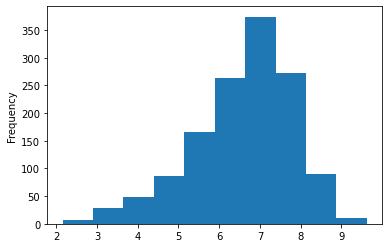

In [1]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_excel('/home/ubuntu/ME-beautydatabase/scores/test.xlsx')
data=data[data['path'].str.contains('/female/',na = False)]
x=data['mean']
plt.hist(x, bins=10)
plt.gca().set(ylabel='Frequency');

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


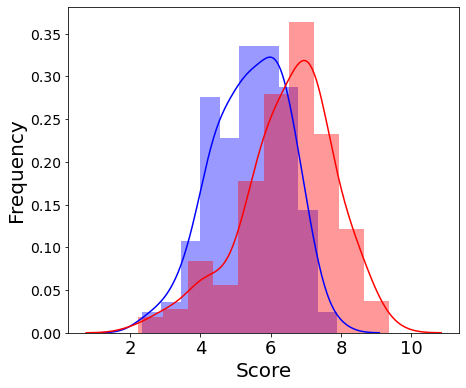

In [3]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns
data=pd.read_excel('/home/ubuntu/ME-beautydatabase/scores/test.xlsx')
#data=data['path'].str.replace('midestern', 'mideastern')
data = data[data['path'].str.contains('/indian/',na = False)]
male=data[data['path'].str.contains('/male/',na = False)]
female = data[data['path'].str.contains('/female/',na = False)]


plt.subplots(figsize=(7,6))
sns.distplot( male['mean'], color="blue", label="male", bins=10)
sns.distplot( female['mean'] , color="red", label="female", bins=10)

#plt.title('Iris Histogram')
#plt.rcParams.update({'axes.titlesize': 'large'})
plt.gca().set(ylabel='Frequency', xlabel = 'Score');
plt.savefig('in_distr.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel('/home/ubuntu/ME-beautydatabase/scores/test3.xlsx')
data['std']= data.std(axis=1)
data = data[data['path'].str.contains('/hispanic/',na = False)]
male=data[data['path'].str.contains('/female/',na = False)]
data.plot(x = 'image', y='std', kind = 'scatter')
plt.gca().set(ylabel='Frequency', xlabel = 'Images');
plt.show()

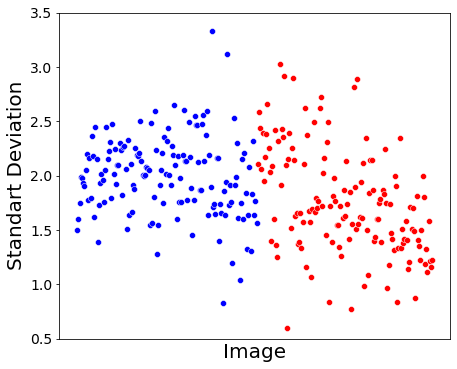

In [4]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns
data=pd.read_excel('/home/ubuntu/ME-beautydatabase/scores/test3.xlsx')
data['std']= data.std(axis=1)
data = data[data['path'].str.contains('/mideastern/',na = False)]

male=data[data['path'].str.contains('/male/',na = False)]
female = data[data['path'].str.contains('/female/',na = False)]


plt.subplots(figsize=(7,6))
sns.scatterplot( y = male['std'], x = male['image'], color="blue")
sns.scatterplot( y = female['std'] , x = female['image'], color="red")
#plt.title('Iris Histogram')
#plt.rcParams.update({'axes.titlesize': 'large'})
plt.gca().set(ylabel='Standart Deviation', xlabel = 'Image');
plt.ylim(0.5, 3.5)
plt.xticks([])
plt.savefig('mi_std.png')